# Global Cybersecurity Threats (2015-2024) EDA

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Data loading

In [2]:
df = pd.read_csv('data/Global_Cybersecurity_Threats_2015-2024.csv')

In [3]:
print('Dataset shape: {} columns and {} rows'.format(df.shape[0], df.shape[1]))

Dataset shape: 3000 columns and 10 rows


In [4]:
print(df.dtypes)

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


In [5]:
df.head()

Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak Passwords                    VPN   
3          Social Engineering     AI-based Detection   
4          Social Engineering                    VPN   

   Incident Resolution Time (in Hours)  
0                                   63  
1                                   71  
2                                   20  
3                                    7  
4                                   68

## Data cleaning

In [6]:
print('Missing values')
print(df.isnull().sum())

Missing values
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [7]:
print('Contains duplicates?')
print(df.duplicated().any())

Contains duplicates?
False


## Data exploration

### Business task 1: Which threats are increasing and where?

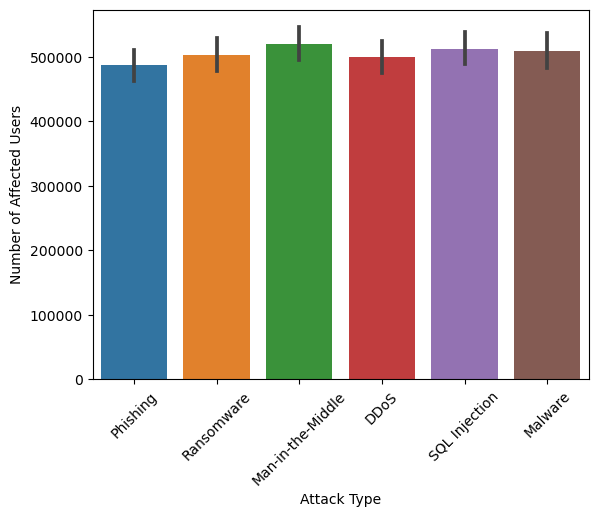

In [8]:
sns.barplot(df, x='Attack Type', y='Number of Affected Users')
plt.xticks(rotation=45)
plt.show()

In [9]:
grouped = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Incident Count')

pivot_df = grouped.pivot(index='Year', columns='Attack Type', values='Incident Count')

In [10]:
import plotly.express as px

fig = px.line(
    grouped,
    x='Year',
    y='Incident Count',
    color='Attack Type',
    title='Cybersecurity Attack types over time'
)

fig.show()

In [11]:
fig = px.area(
    grouped,
    x='Year',
    y='Incident Count',
    color='Attack Type',
    title='Cybersecurity Attack types over time'
)

fig.show()

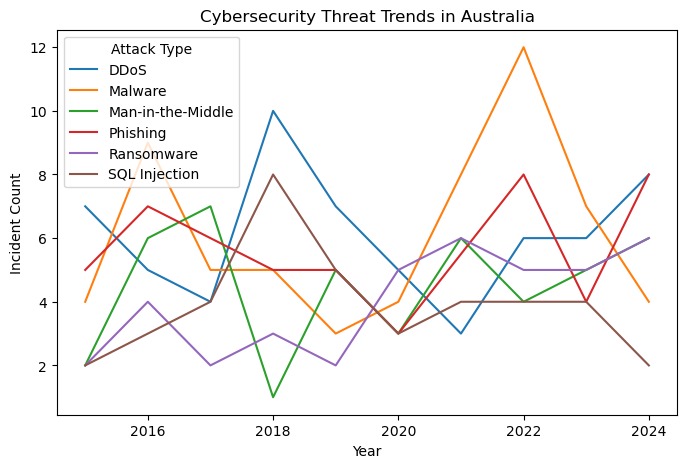

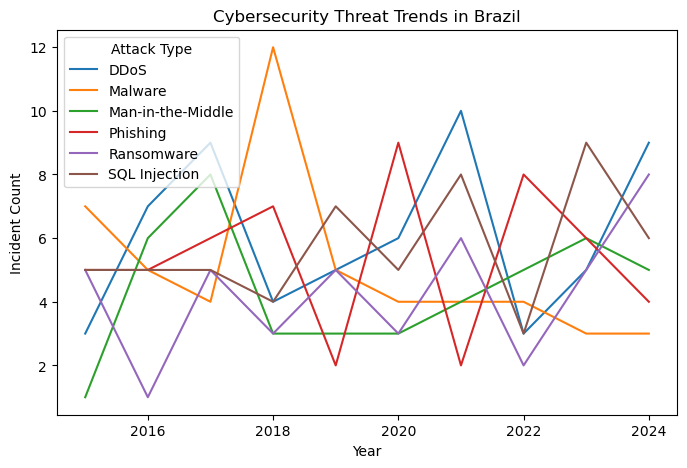

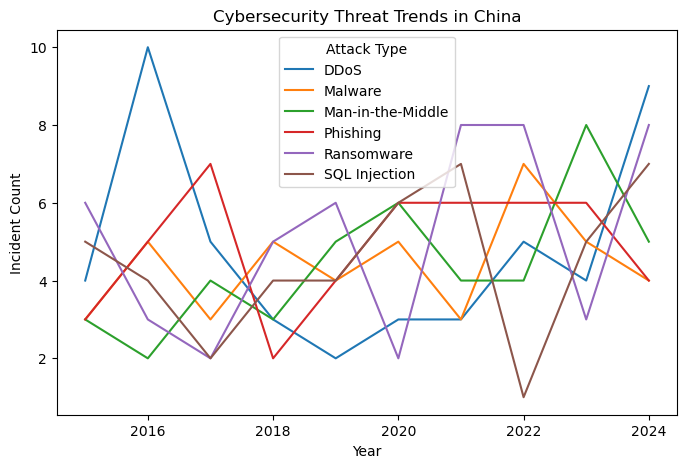

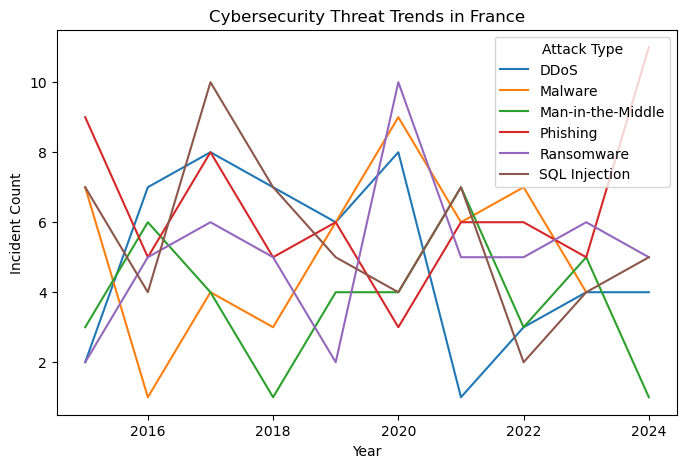

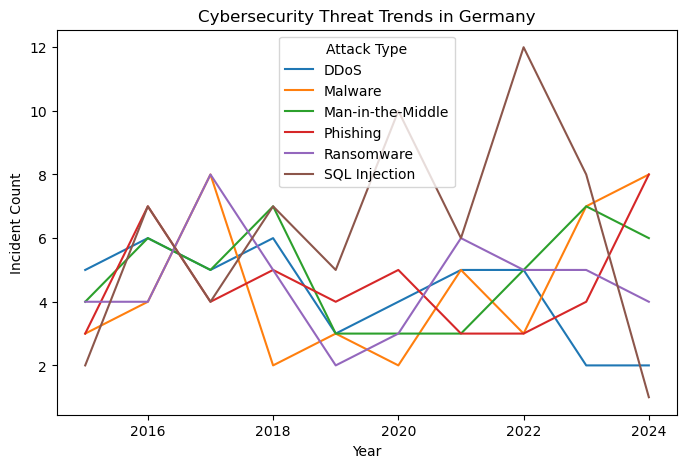

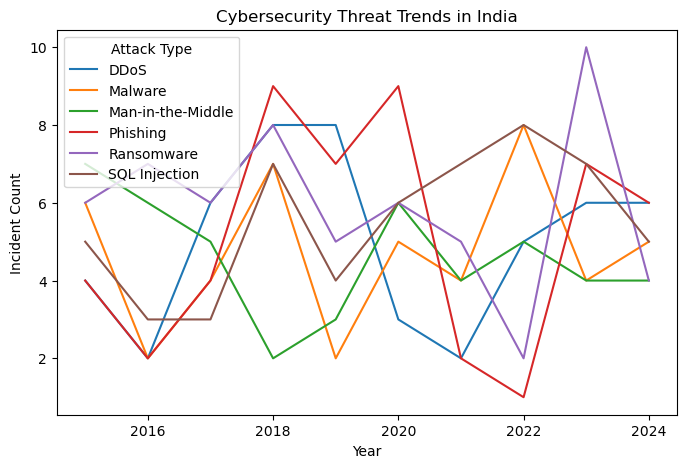

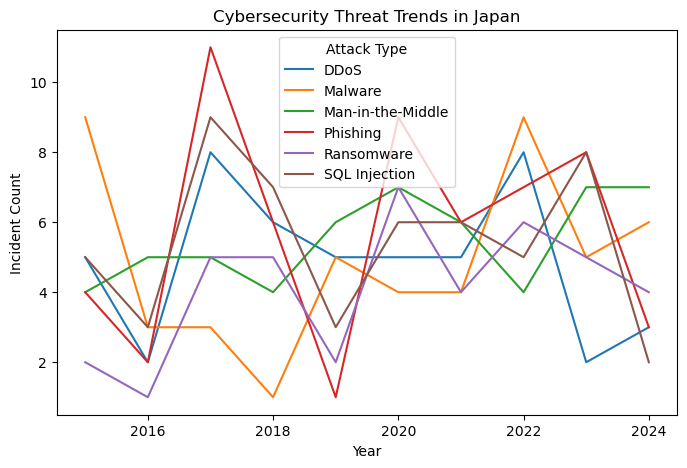

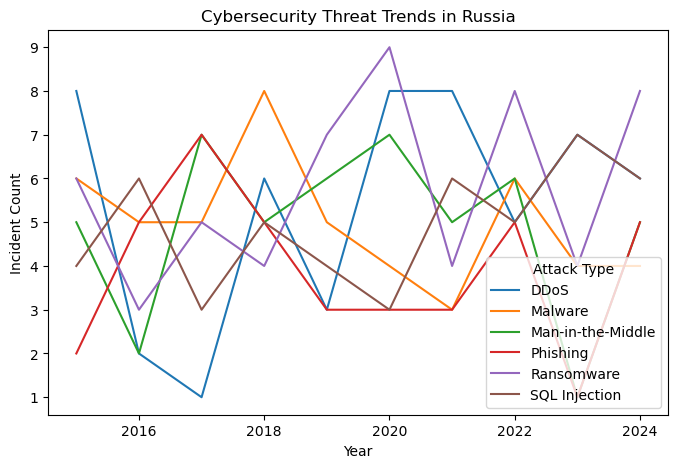

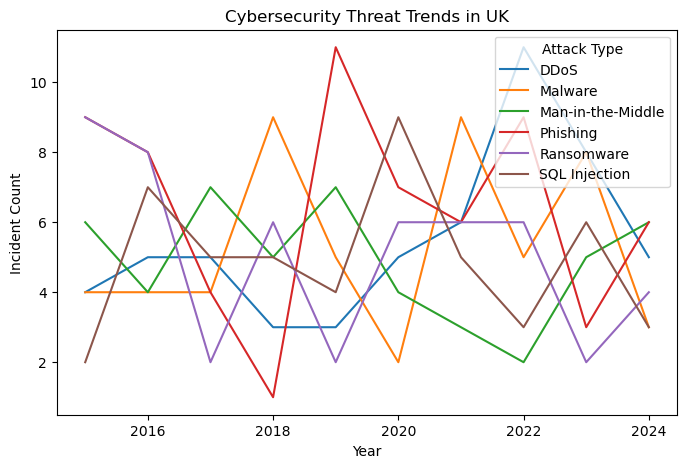

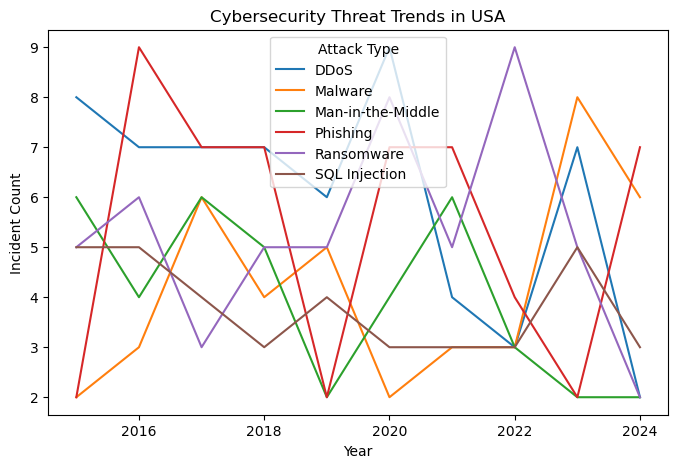

In [12]:
grouped = (
    df.groupby(['Year', 'Country', 'Attack Type']).size().reset_index(name='Incident Count')
)

countries = grouped['Country'].unique()

for country in countries:
    df_country = grouped[grouped['Country'] == country]
    
    plt.figure(figsize=(8, 5))
    
    sns.lineplot(
        data=df_country,
        x='Year',
        y='Incident Count',
        hue='Attack Type'
    )
    
    plt.title(f'Cybersecurity Threat Trends in {country}')
    plt.xlabel('Year')
    plt.ylabel('Incident Count')
    plt.legend(title='Attack Type')
    
    plt.show()

### Business task 2: Which industries are most affected in terms of incidents and finance?

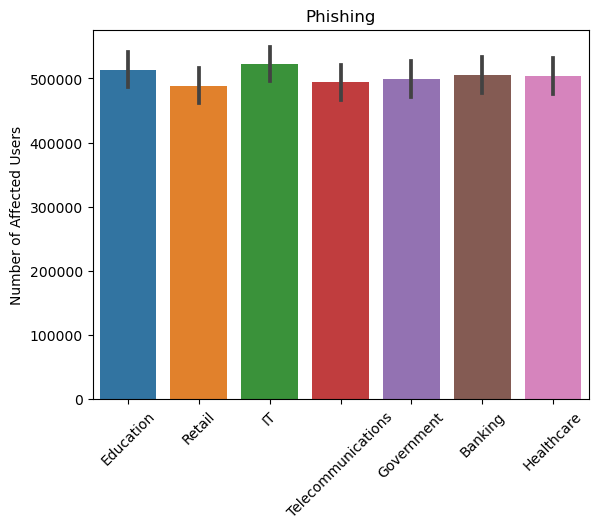

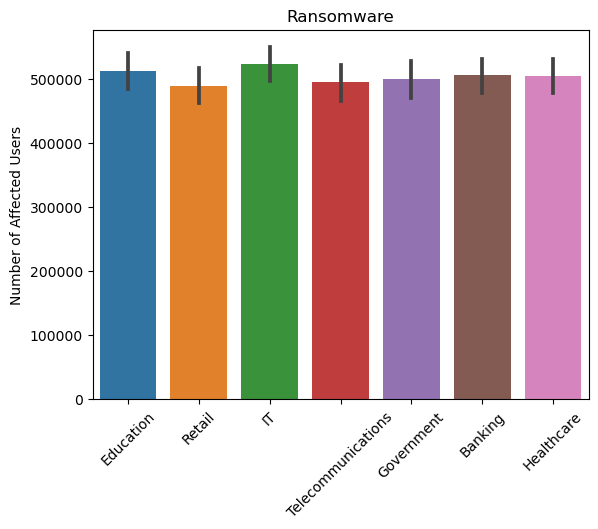

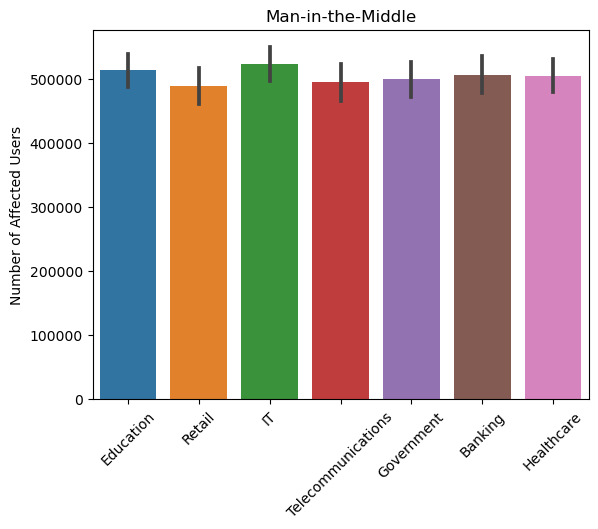

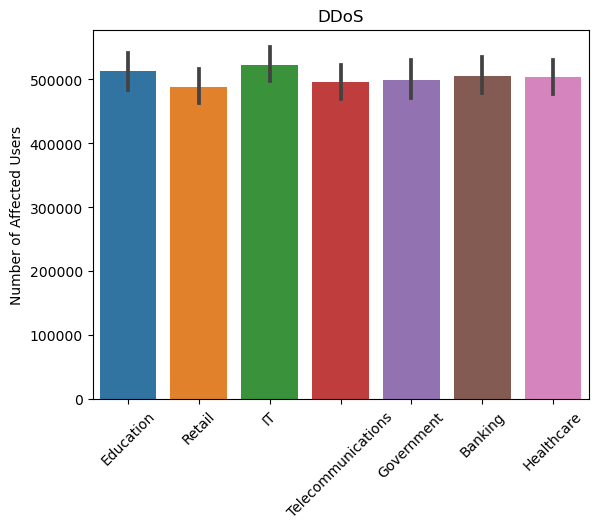

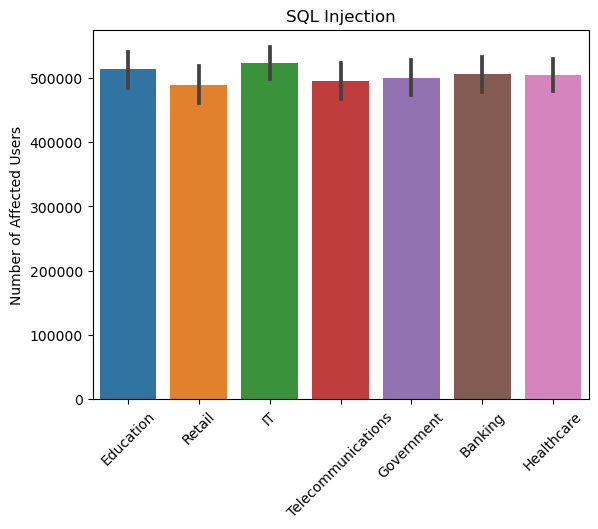

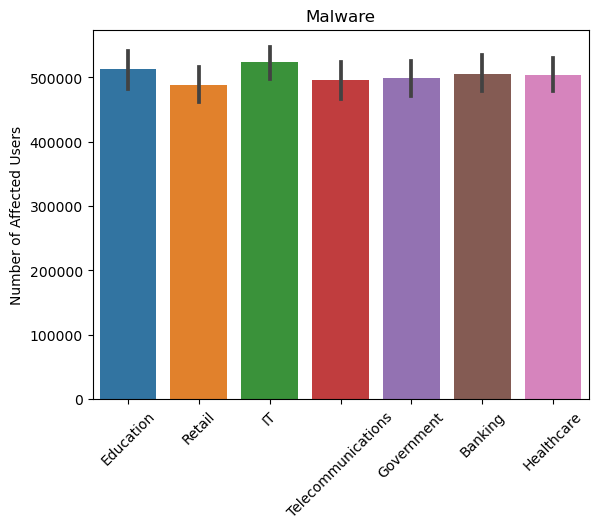

In [13]:
for attack in df['Attack Type'].unique():
    sns.barplot(df, x='Target Industry', y='Number of Affected Users')
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.title(f'{attack}')
    plt.show()

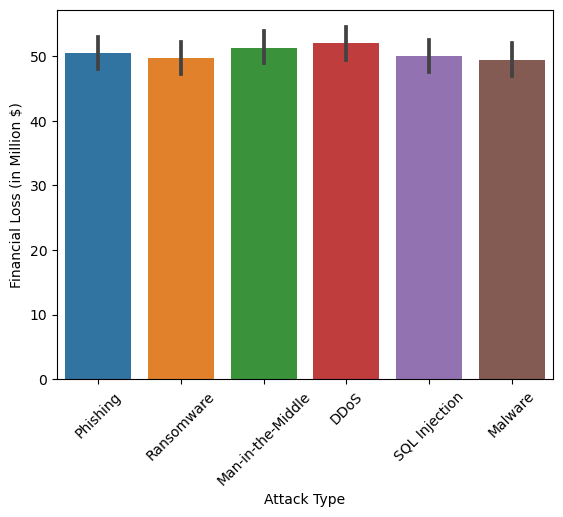

In [14]:
sns.barplot(df, x='Attack Type', y='Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.show()

In [15]:
agg_industries = df.groupby('Target Industry').agg(
    Total_Incidents = ('Attack Type', 'count'),
    Total_Loss = ('Financial Loss (in Million $)', 'sum')
).reset_index()

top5_industries = agg_industries.sort_values('Total_Incidents', ascending=False).head(5)

top5_loss = agg_industries.sort_values('Total_Loss', ascending=False).head(5)

In [16]:
# Top 5 industries being targeted the most
top5_industries.head()

Target Industry  Total_Incidents  Total_Loss
4              IT              478    24809.83
0         Banking              445    22772.39
3      Healthcare              429    21041.29
5          Retail              423    21119.55
1       Education              419    20071.43

In [17]:
# Top 5 industries having the most losses financially
top5_loss.head()

Target Industry  Total_Incidents  Total_Loss
4              IT              478    24809.83
0         Banking              445    22772.39
2      Government              403    21205.33
5          Retail              423    21119.55
3      Healthcare              429    21041.29

### Business task 3: Which attack types cause the most losses?

In [18]:
# Average loss per incident
agg_industries['Avg_Loss_per_Incident ($M)'] = (
    round(agg_industries['Total_Loss'] / agg_industries['Total_Incidents'], 2)
)

agg_industries.sort_values('Avg_Loss_per_Incident ($M)', ascending=False).head(5)

Target Industry  Total_Incidents  Total_Loss  Avg_Loss_per_Incident ($M)
2          Government              403    21205.33                       52.62
4                  IT              478    24809.83                       51.90
0             Banking              445    22772.39                       51.17
6  Telecommunications              403    20459.09                       50.77
5              Retail              423    21119.55                       49.93

In [19]:
loss_by_attack = (
    df.groupby('Attack Type')['Financial Loss (in Million $)']
        .sum()
        .sort_values(ascending=False)
        .reset_index()
)

loss_by_attack.head()

Attack Type  Financial Loss (in Million $)
0           DDoS                       27630.92
1       Phishing                       26693.29
2  SQL Injection                       25156.56
3     Ransomware                       24479.32
4        Malware                       23967.95

In [20]:
attack_summary = df.groupby('Attack Type').agg(
    Total_Loss = ('Financial Loss (in Million $)', 'sum'),
    Total_Incidents = ('Attack Type', 'count')
).reset_index()

attack_summary['Avg_Loss_per_Incident'] = (
    round(attack_summary['Total_Loss'] / attack_summary['Total_Incidents'], 2)
)

attack_summary.head()

Attack Type  Total_Loss  Total_Incidents  Avg_Loss_per_Incident
0               DDoS    27630.92              531                  52.04
1            Malware    23967.95              485                  49.42
2  Man-in-the-Middle    23550.87              459                  51.31
3           Phishing    26693.29              529                  50.46
4         Ransomware    24479.32              493                  49.65

### Business task 4: Are resolution times improving?

In [21]:
resolution_trend = (
    df.groupby('Year')['Incident Resolution Time (in Hours)']
        .mean()
        .reset_index()
)

resolution_trend

Year  Incident Resolution Time (in Hours)
0  2015                            38.429603
1  2016                            35.922807
2  2017                            35.388715
3  2018                            36.980645
4  2019                            35.307985
5  2020                            36.444444
6  2021                            36.167224
7  2022                            37.204403
8  2023                            36.946032
9  2024                            35.929766

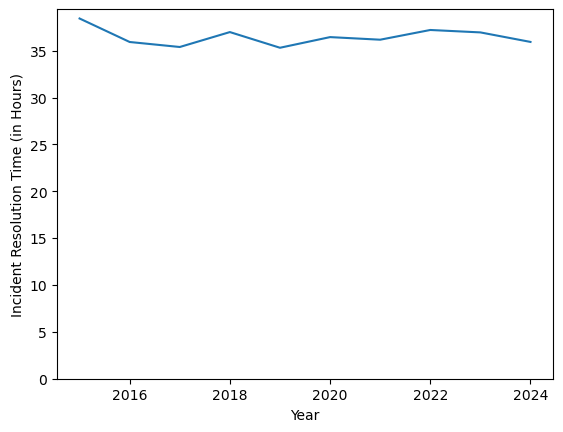

In [22]:
sns.lineplot(resolution_trend, x='Year', y='Incident Resolution Time (in Hours)')
plt.ylim(0, resolution_trend['Incident Resolution Time (in Hours)'].max() + 1)
plt.show()

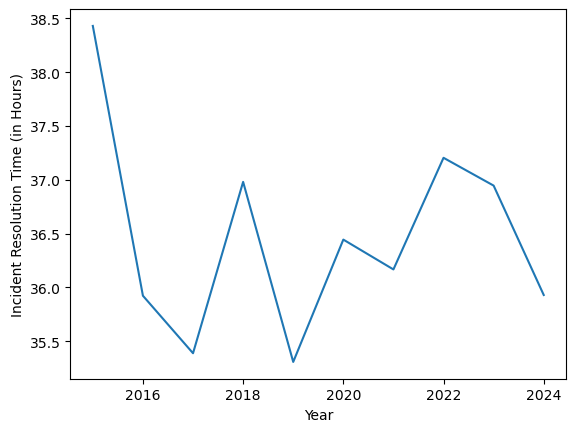

In [23]:
sns.lineplot(resolution_trend, x='Year', y='Incident Resolution Time (in Hours)')
plt.show()

In [24]:
# H0 (Null hypothesis): No trend over time
# H1 (Alternative hypothesis): Resolution time decreases over time

In [25]:
import statsmodels.api as sm

X = resolution_trend['Year']
X = sm.add_constant(X)

y = resolution_trend['Incident Resolution Time (in Hours)']

model = sm.OLS(y, X).fit()

print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Incident Resolution Time (in Hours)   R-squared:                       0.021
Model:                                             OLS   Adj. R-squared:                 -0.101
Method:                                  Least Squares   F-statistic:                    0.1755
Date:                                 Fri, 27 Feb 2026   Prob (F-statistic):              0.686
Time:                                         17:08:24   Log-Likelihood:                -13.009
No. Observations:                                   10   AIC:                             30.02
Df Residuals:                                        8   BIC:                             30.62
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                 coef    std err        

In [26]:
# Based on these results:
# Year = -0.0458 means that resolution time decreases by about that much per year,
# meaning that the change is negligible
#
# P > |t| = 0.686 is more than 0.05, therefore accept the null hypothesis. There
# is no significant change in resolution time.
#
# Regression analysis showed the trend was not statistically significant, despite 
# the visual inspection that suggested otherwise.

## Data preparation for Power BI

In [27]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [28]:
df['Financial Loss ($M)'] = df['Financial Loss (in Million $)']

df['Affected Users'] = df['Number of Affected Users']

df['Incident Resolution Time (h)'] = df['Incident Resolution Time (in Hours)']

df['Loss per Affected User'] = (
    round(df['Financial Loss ($M)'] / df['Affected Users'], 2)
)

df['Resolution Category'] = pd.cut(
    df['Incident Resolution Time (h)'],
    bins=[0, 24, 72, 168, float('inf')],
    labels=['Under a day', '1-3 days', '3-7 days', 'Over a week']
)

df = df.drop(columns=['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)'], axis=1)

In [29]:
# Normalise using Min-Max scaling
df['Loss norm'] = (
    (df['Financial Loss ($M)'] - df['Financial Loss ($M)'].min()) /
    (df['Financial Loss ($M)'].max() - df['Financial Loss ($M)'].min())
)

df['User norm'] = (
    (df['Affected Users'] - df['Affected Users'].min()) /
    (df['Affected Users'].max() - df['Affected Users'].min())
)

df['Res norm'] = (
    (df['Incident Resolution Time (h)'] - df['Incident Resolution Time (h)'].min()) /
    (df['Incident Resolution Time (h)'].max() - df['Incident Resolution Time (h)'].min())
)


# Severity=0.5(Loss norm) + 0.3(User norm) + 0.2(Res norm)
df['Severity Score'] = (
    df['Loss norm'] * 0.5 +
    df['User norm'] * 0.3 +
    df['Res norm'] * 0.2
)

In [30]:
df.isnull().sum()

Country                         0
Year                            0
Attack Type                     0
Target Industry                 0
Attack Source                   0
Security Vulnerability Type     0
Defense Mechanism Used          0
Financial Loss ($M)             0
Affected Users                  0
Incident Resolution Time (h)    0
Loss per Affected User          0
Resolution Category             0
Loss norm                       0
User norm                       0
Res norm                        0
Severity Score                  0
dtype: int64

In [31]:
df.to_csv('data/cybersecurity_cleaned.csv', index=False)